In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

# Read Data

In [28]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Get Data infos

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Describe Data

In [34]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check if there are Null values

In [37]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Drop useless Column

In [40]:
df.drop(columns='id',inplace=True)

In [44]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Exploratory Data Analysis(EDA)

In [46]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [48]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [52]:
from sklearn.preprocessing import OrdinalEncoder


order = [['B', 'M']]  


encoder = OrdinalEncoder(categories=order)


df['diagnosis'] = encoder.fit_transform(df[['diagnosis']]).astype(int)

print("Categories in Encoder:", encoder.categories_)


Categories in Encoder: [array(['B', 'M'], dtype=object)]


In [54]:
# Beginin -> 0, Malignant - >1
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

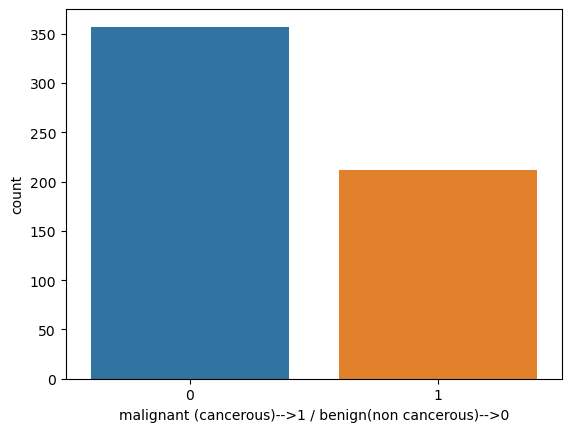

In [56]:
sns.countplot(data = df, x='diagnosis')
plt.xlabel('malignant (cancerous)-->1 / benign(non cancerous)-->0')
plt.show();

Visualize the distribution of radius mean by diagnosis

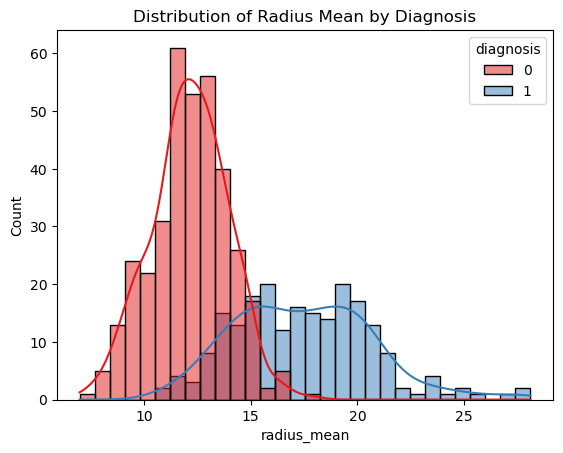

In [58]:
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show();

Visualize pairwise relationships between multiple numerical features

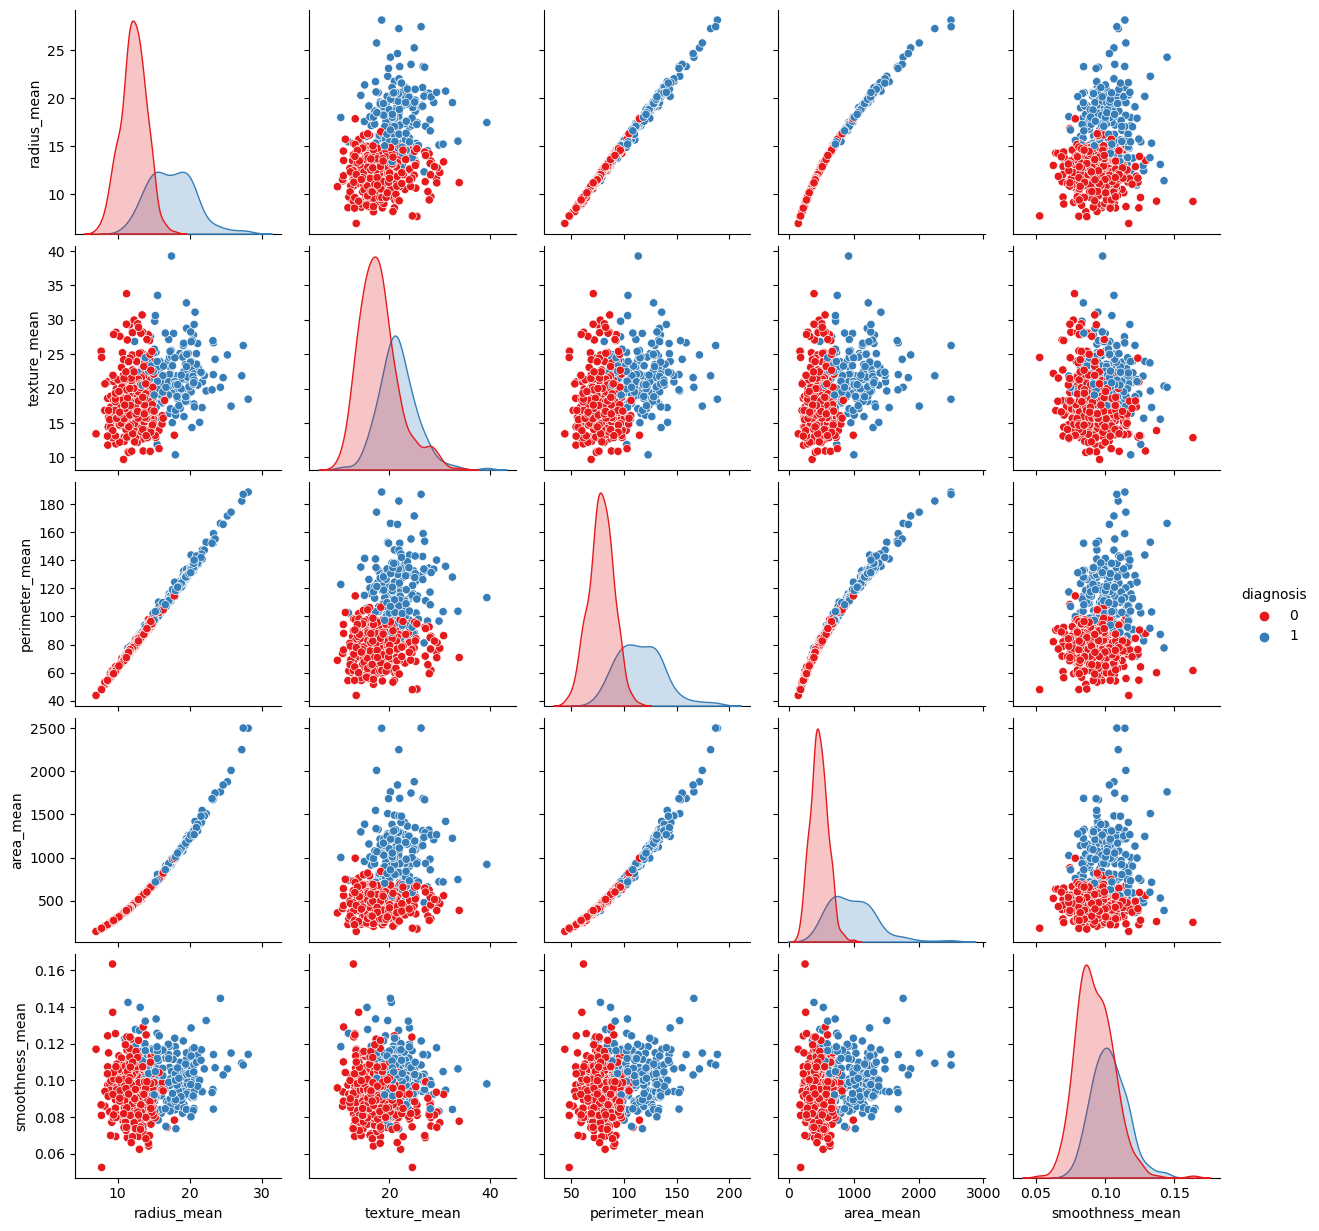

In [69]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis', palette= 'Set1')
plt.show();

Understand correlationships between numerical features

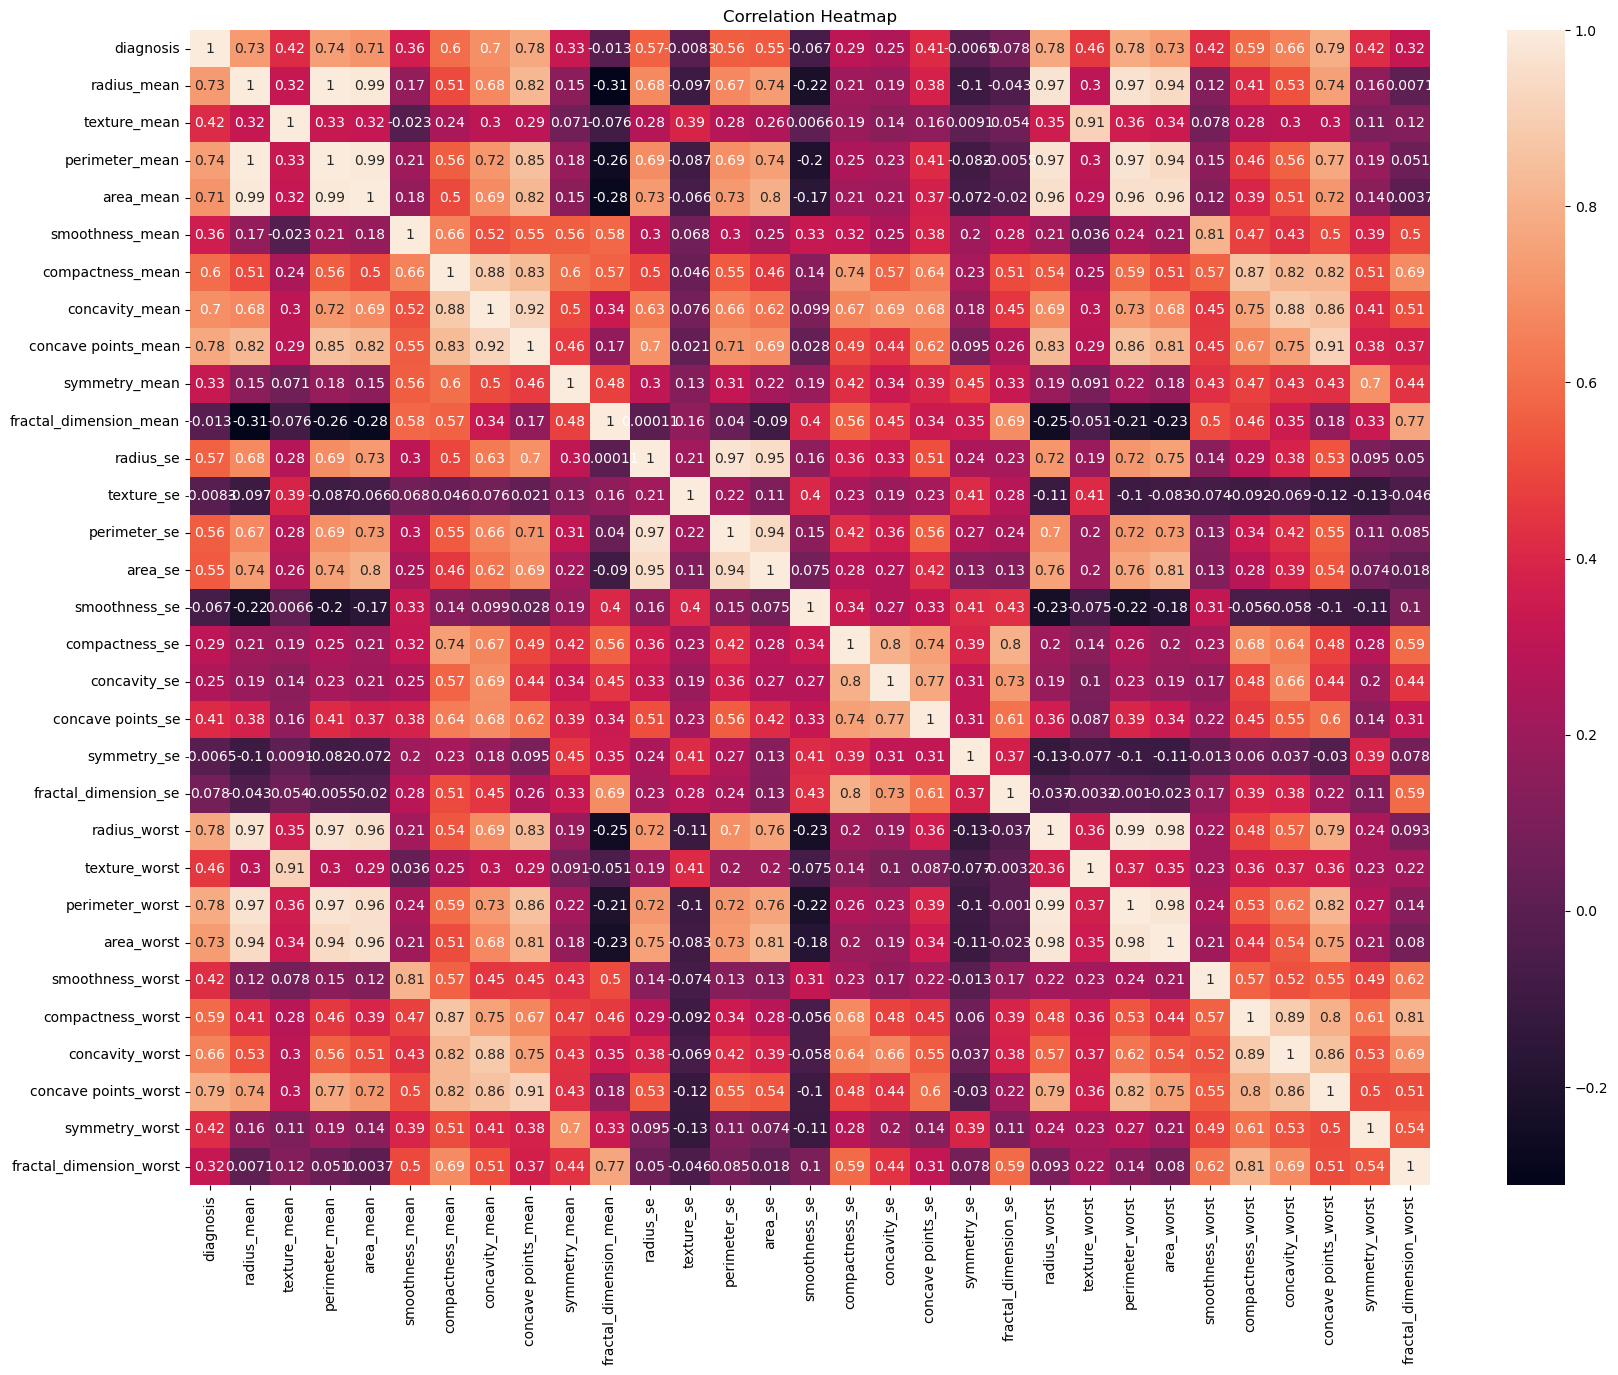

In [72]:
num_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = num_df.corr() 
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show();

Display high correlations between each two features

In [74]:
numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()

corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])
corr = corr_pairs.sort_values(by='Correlation', ascending=False)
corr

,Feature 1,Feature 2,Correlation
34,radius_mean,perimeter_mean,0.997855
674,radius_worst,perimeter_worst,0.993708
35,radius_mean,area_mean,0.987357
97,perimeter_mean,area_mean,0.986507
675,radius_worst,area_worst,0.984015
...,...,...,...
334,fractal_dimension_mean,area_worst,-0.231854
331,fractal_dimension_mean,radius_worst,-0.253691
103,perimeter_mean,fractal_dimension_mean,-0.261477
134,area_mean,fractal_dimension_mean,-0.283110


We can observe that there is a strong correlation between these two features: 
- radius_mean and perimeter_mean (0.997855)- 
radius_worst and perimeter_worst (0.993708;, the "worst" versions of these-  features are strongly correlated.- 
radius_mean and area_mean (0.98735
- : Larger radii are strongly associated with larger areas-een redius_worst and area_wor- een redius_se, area_se and perimete

  To avoid redundancy during model training, we need to delete one the features which are identical, since they are almost similar.r_se

Drop perimeter_mean and area mean

In [82]:
df.drop(['perimeter_mean','area_mean'],axis=1,inplace=True)

Drop perimeter_se and area_se

In [78]:
df.drop(['perimeter_se','area_se'],axis=1,inplace=True)

Drop perimeter_worst and area_worst

In [76]:
df.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)

# Split DataSet

In [97]:
from sklearn.model_selection import train_test_split


In [99]:
X = df.drop(columns='diagnosis' ,axis=1)
y = df['diagnosis']

Scaling Data

In [105]:
sc =StandardScaler()

X_scaled = sc.fit_transform(X)

Split the dataset

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


In [19]:
X_train.shape

(455, 30)

In [109]:
y_train.shape

(455,)

In [20]:
X_test.shape

(114, 30)

In [111]:
y_test.shape

(114,)

# Evaluation Function

In [114]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

# Modeling

## Logistic Regression

In [119]:
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
# Make predictions
final_res = []
y_pred_LR = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
final_res.append(accuracy)

In [125]:
evaluate_model(y_test,y_pred_LR)

Accuracy: 0.956140350877193
Precision: 0.975
Recall: 0.9069767441860465
ROC AUC: 0.9464461185718964


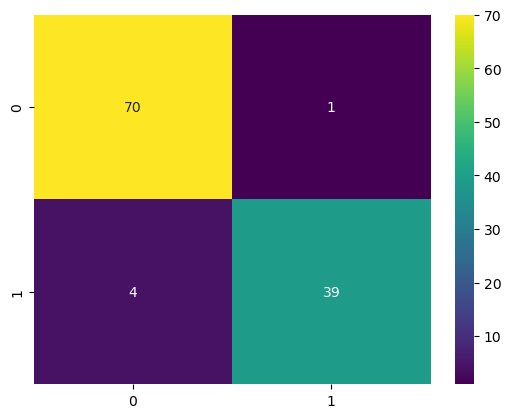

In [143]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.show();

# Random Forest Classifier

In [145]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [151]:
# Make predictions
y_pred_RF = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
final_res.append(accuracy)

In [153]:
evaluate_model(y_test,y_pred_RF)

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
ROC AUC: 0.9510317720275139


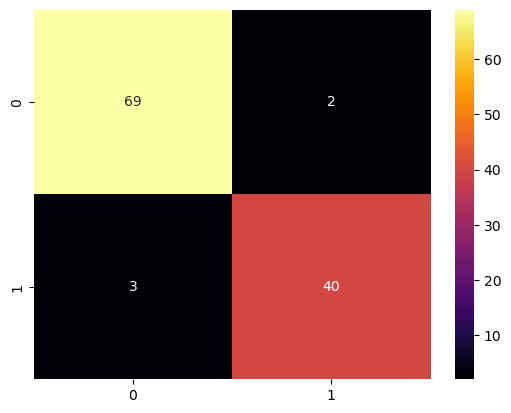

In [157]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cmap="inferno")
plt.show();

## Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(random_state=42)
ds.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [162]:
y_pred_DT = ds.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_DT)
final_res.append(accuracy)

In [166]:
evaluate_model(y_test,y_pred_DT)

Accuracy: 0.9298245614035088
Precision: 0.9069767441860465
Recall: 0.9069767441860465
ROC AUC: 0.9253193580085161


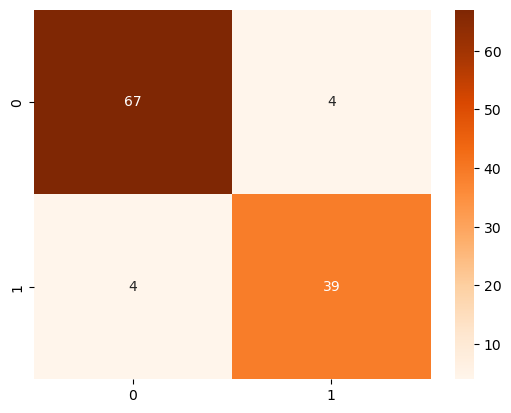

In [168]:
cm = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.show();

## Support Vector Machine(SVM)

In [171]:
from sklearn.svm import SVC
svm= SVC(random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [173]:
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
final_res.append(accuracy)

In [175]:
evaluate_model(y_test,y_pred_svm)

Accuracy: 0.9473684210526315
Precision: 0.9743589743589743
Recall: 0.8837209302325582
ROC AUC: 0.9348182115951523


## Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

In [180]:
y_pred_nb = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
final_res.append(accuracy)

In [182]:
evaluate_model(y_test,y_pred_nb)

Accuracy: 0.9473684210526315
Precision: 0.9743589743589743
Recall: 0.8837209302325582
ROC AUC: 0.9348182115951523


### *Compare accuracy of all models*

In [188]:
final=np.array(final_res)
result=final.reshape(5,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest','SVM','Naive Bayes' ,'Decision Tree']
final_result=pd.DataFrame(result,index=index,columns=columns)

In [190]:
final_result

,Accuracy
Logistic Regression,0.956140
Random Forest,0.956140
SVM,0.929825
Naive Bayes,0.947368
Decision Tree,0.947368
